# Predict Movements using Polynomials
Trackpy's projection tools use a prediction where velocity is constant. We know that the peak movements slow and accelerate over time, and that the apparent movement should approach zero at frame 0 (noting that the spacing between those frames are smaller).

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from nmrtrack.trackpy import PeakMovementPredict
import pandas as pd
import numpy as np

## Load in the Tracks
Let's start with the tracks from the previous example

In [2]:
peak_data = pd.read_csv('tracks/nearest-velocity-tracks.csv')

## Find an Example Peak
One that is long and has a 

In [3]:
chosen_id = peak_data.query('7.25<offset<7.3 and 150<frame<175')['particle'].mode().iloc[0]

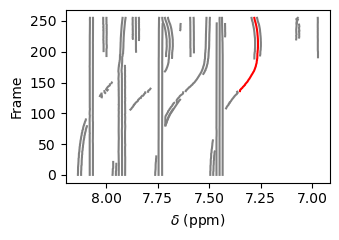

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2.5), sharex=True)

for gid, group in peak_data.groupby('particle'):
    ax.plot(group['offset'], group['frame'], '-', lw=1.5, color='r' if gid == chosen_id else 'gray')

ax.set_ylabel('Frame')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel('$\delta$ (ppm)')

fig.tight_layout()

Fit a polynomial to this peak

In [5]:
subset = peak_data.query(f'particle == {chosen_id}')
poly = PeakMovementPredict(order=3).fit_predictor(subset['frame'].values, subset['offset'].values)

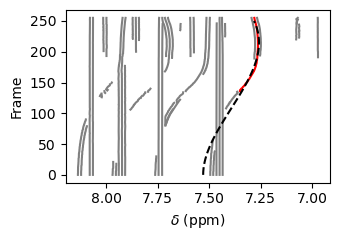

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 2.5), sharex=True)

for gid, group in peak_data.groupby('particle'):
    ax.plot(group['offset'], group['frame'], '-', lw=1.5, color='r' if gid == chosen_id else 'gray')
    
frames = np.linspace(0, 250)
ax.plot(poly(frames), frames, 'k--')

ax.set_ylabel('Frame')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel('$\delta$ (ppm)')

fig.tight_layout()

We do a good job of getting the next part of the track (near 7.4 ppm), which was missed by the original tracking. 

In [7]:
linker = PeakMovementPredict(order=3, max_history=32, min_history=16)
peak_data['frame'] *= -1
peak_data = linker.link_df(peak_data, search_range=0.008, memory=64)
peak_data['frame'] *= -1

Frame 0: 17 trajectories present.


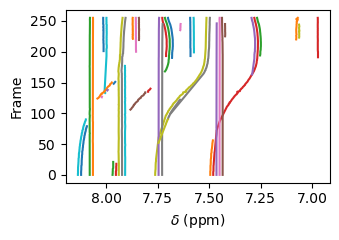

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 2.5), sharex=True)

for gid, group in peak_data.groupby('particle'):
    ax.plot(group['offset'], group['frame'], '-', lw=1.5)

ax.set_ylabel('Frame')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel('$\delta$ (ppm)')

fig.tight_layout()
fig.savefig('figures/polynomial-projection-result.png', dpi=320)

In [9]:
subset = peak_data.query(f'particle == {chosen_id}')
peak_data['frame'] *= -1
poly = PeakMovementPredict(order=3, max_history=50).fit_predictor(subset['frame'].values, subset['offset'].values)
peak_data['frame'] *= -1

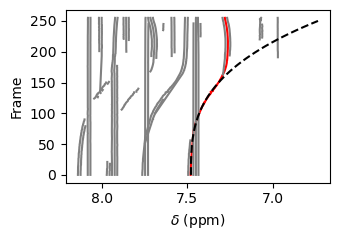

In [10]:
fig, ax = plt.subplots(figsize=(3.5, 2.5), sharex=True)

for gid, group in peak_data.groupby('particle'):
    ax.plot(group['offset'], group['frame'], '-', lw=1.5, color='r' if gid == chosen_id else 'gray')
    
frames = np.linspace(0, 250)
ax.plot(poly(frames), frames, 'k--')

ax.set_ylabel('Frame')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel('$\delta$ (ppm)')

fig.tight_layout()

We are now succeeding at matching peaks which move across others

In [11]:
peak_data.to_csv('tracks/polynomial-predict-tracks.csv', index=False)